In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#######################################################################################
# Reading the data file (CSV) and defining feature and target column
#######################################################################################
# 1. Reading the data file (CSV)
df = pd.read_csv("../0000_Data/01-raw/01-Ad.csv")

# 2. Defining feature columns and target column
x_values = df.iloc[:, 3:5].values
y_values = df.iloc[:, -1].values    

In [4]:
########################################################################################
# Preprocessing Data
########################################################################################
# Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.25, stratify=y_values, random_state=40)

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
##########################################################################################
# Building the with KNN_Model & Prediction
##########################################################################################
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)

In [6]:
##########################################################################################
# Building the with Logistic regression & Prediction 
##########################################################################################
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(x_test_scaled)

KNN Model Evaluation:
F1 Score: 0.8767
AUC: 0.9054
Accuracy: 0.9100

Logistic Regression Model Evaluation:
F1 Score: 0.7333
AUC: 0.7899
Accuracy: 0.8400


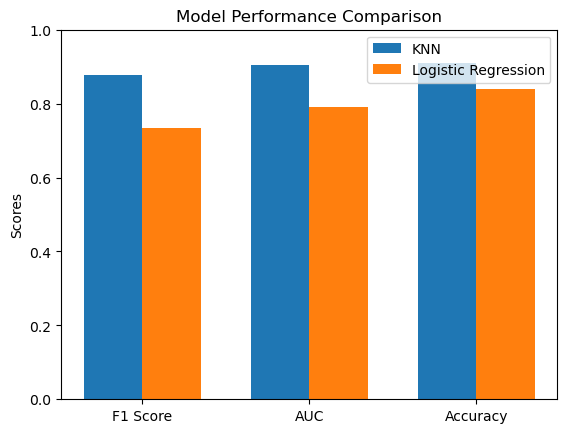

In [ ]:
#########################################################################################
# Evaluating the Model with F1 Score & AUC & Accuracy for KNN & Logistic regression
#########################################################################################
# Evaluating the KNN model
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
f1_knn = f1_score(y_test, y_pred)
auc_knn = roc_auc_score(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)
print("KNN Model Evaluation:")
print(f"F1 Score: {f1_knn:.4f}")
print(f"AUC: {auc_knn:.4f}")
print(f"Accuracy: {accuracy_knn:.4f}")
# Evaluating the Logistic Regression model
f1_log_reg = f1_score(y_test, y_pred_log_reg)
auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("\nLogistic Regression Model Evaluation:")
print(f"F1 Score: {f1_log_reg:.4f}")
print(f"AUC: {auc_log_reg:.4f}")
print(f"Accuracy: {accuracy_log_reg:.4f}")

# Visualizing the model performance with a bar chart
metrics = ['F1 Score', 'AUC', 'Accuracy']
knn_scores = [f1_knn, auc_knn, accuracy_knn]
log_reg_scores = [f1_log_reg, auc_log_reg, accuracy_log_reg]
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, knn_scores, width, label='KNN')
rects2 = ax.bar(x + width/2, log_reg_scores, width, label='Logistic Regression')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()